In [1]:
import sys
# path = r'C:\Users\wander\Documents\Python Scripts\PAREPYDEV'
path = r'C:\Users\rezio\OneDrive\Documentos\.git codes\PAREPY' # PC notebook luiz
# path = r'C:\Users\wander\Documents\GitHub\PAREPYDEV_NEW'
# path = r'C:\Users\wande\OneDrive\Documentos\GitHub\PAREPY' # PC notebook wander
sys.path.append(path)
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
# Libraries
from parepy_toolbox import sampling_algorithm_structural_analysis
from obj_function import nowak_collins_example

# Statement random variables
f = {
        'type': 'normal', 
        'parameters': {'mean': 40.3, 'sigma': 4.64}, 
        'stochastic variable': False, 
    }

p = {
        'type': 'gumbel max',
        'parameters': {'mean': 10.2, 'sigma': 1.12}, 
        'stochastic variable': False, 
    }

w = {
        'type': 'lognormal',
        'parameters': {'mean': 0.25, 'sigma': 0.025}, 
        'stochastic variable': False, 
    }
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 1000, 
             'numerical model': {'model sampling': 'mcs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': nowak_collins_example,
             'name simulation': None,
        }

# Call algorithm
results, pf, beta = sampling_algorithm_structural_analysis(setup)

ModuleNotFoundError: No module named 'parepy_toolbox'

In [ ]:
pf_list = pf.values.flatten().tolist()
beta_list = beta.values.flatten().tolist()
for i, (p, b) in enumerate(zip(pf_list, beta_list)):
    print(f"State Limite function (g): {i}, pf: {p:.6f}, beta: {b:.6f}")


State Limite function (g): 0, pf: 0.003000, beta: 2.747781
State Limite function (g): 1, pf: 0.003000, beta: 2.747781
State Limite function (g): 2, pf: 0.003000, beta: 2.747781
State Limite function (g): 3, pf: 0.004000, beta: 2.652070
State Limite function (g): 4, pf: 0.004000, beta: 2.652070


C:\Users\rezio\AppData\Local\Temp\ipykernel_14768\4147696949.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


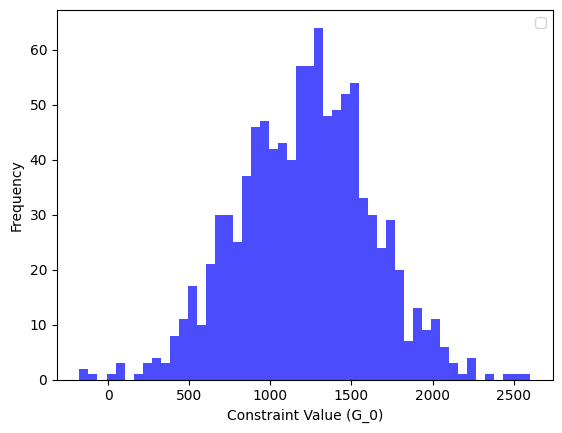

In [ ]:
# Libraries
import matplotlib.pyplot as plt

# Plot histogram of G_0
plt.hist(results['G_0'], bins=50, alpha=0.7, color='blue')
plt.xlabel("Constraint Value (G_0)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


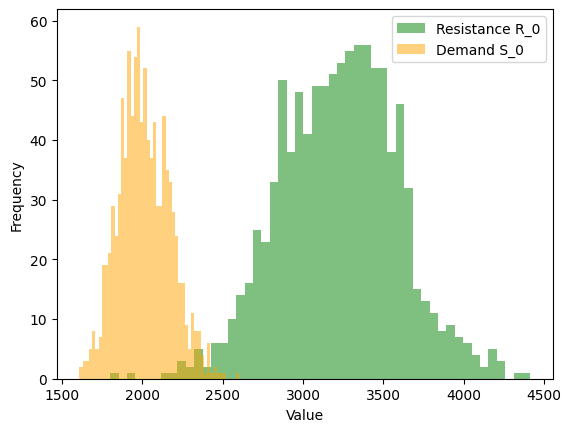

In [ ]:
# Libraries
import matplotlib.pyplot as plt

# Plot histograms - R_0 and S_0
plt.hist(results['R_0'], bins=50, alpha=0.5, color='green', label='Resistance R_0')
plt.hist(results['S_0'], bins=50, alpha=0.5, color='orange', label='Demand S_0')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
from parepy_toolbox import sampling_algorithm_structural_analysis_kernel
from obj_function import nowak_collins_example

# Dataset
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False}
p = {'type': 'normal', 'parameters': {'mean': 10.2, 'sigma': 1.12, 'cov': {'pho': 0.30, 'var': 0}}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 10, 
             'number of dimensions': len(var), 
             'numerical model': {'model sampling': 'mcs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': nowak_collins_example,
             'name simulation': None,
        }

# Call algorithm
sampling_algorithm_structural_analysis_kernel(setup)

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,31.839037,9.260848,0.285202,2547.122947,2163.382828,383.740119,0.0
1,43.322111,10.609650,0.266569,3465.768916,2127.552456,1338.216460,0.0
2,38.080498,6.896132,0.238130,3046.439839,1761.164370,1285.275469,0.0
3,38.780773,10.602982,0.271136,3102.461837,2153.824944,948.636893,0.0
4,36.945832,11.287277,0.267152,2955.666567,2167.542389,788.124178,0.0
5,40.319137,10.216002,0.210121,3225.530967,1777.089796,1448.441172,0.0
6,45.298544,11.045049,0.239747,3623.883519,1994.639842,1629.243677,0.0
7,42.487143,10.794809,0.203383,3398.971453,1769.047407,1629.924045,0.0
8,35.458655,10.749617,0.277692,2836.692410,2199.979861,636.712549,0.0
9,33.822647,9.426615,0.201278,2705.811771,1682.892337,1022.919434,0.0


In [ ]:
# Libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

from parepy_toolbox import sampling_algorithm_structural_analysis
from obj_function import nowak_collins_time_example

# Statement random variables
f = {
        'type': 'normal', 
        'parameters': {'mean': 40.3, 'sigma': 4.64}, 
        'stochastic variable': False, 
    }

p = {
        'type': 'gumbel max',
        'parameters': {'mean': 10.2, 'sigma': 1.12}, 
        'stochastic variable': True, 
    }

w = {
        'type': 'lognormal',
        'parameters': {'mean': 0.25, 'sigma': 0.025}, 
        'stochastic variable': False, 
    }
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 1000, 
             'numerical model': {'model sampling': 'mcs-time', 'time steps': 5}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': {'time analysis': list(np.linspace(0, 50, num=5, endpoint=True))},
             'objective function': nowak_collins_time_example,
             'name simulation': None,
        }

# Call algorithm
results, pf, beta = sampling_algorithm_structural_analysis(setup)


13:42:29 - Checking inputs completed!
13:42:29 - Started State Limit Function evaluation (g)...
13:42:30 - Finished State Limit Function evaluation (g) in 1.71e+00 seconds!
13:42:30 - Started evaluation beta reliability index and failure probability...
13:42:30 - Finished evaluation beta reliability index and failure probability in 1.28e-02 seconds!
13:42:30 - Voilà!!!!....simulation results were not saved in a text file!


In [ ]:
# Acess pf results
pf_list = pf['G_0'].tolist()
print(pf_list)


[0.003, 0.003, 0.003, 0.004, 0.004]


In [ ]:
# Acess beta results
beta_list = beta['G_0'].tolist()
print(beta_list)


[2.7477813854449726, 2.7477813854449726, 2.7477813854449726, 2.652069807902187, 2.652069807902187]


In [ ]:
pf_list = pf['G_0'].tolist()
beta_list = beta['G_0'].tolist()
for i, (p, b) in enumerate(zip(pf_list, beta_list)):
    print(f"Time step (id={i}, time={setup['none variable']['time analysis'][i]}), pf: {p:.6f}, beta: {b:.6f}")


Time step (id=0, time=0.0), pf: 0.003000, beta: 2.747781
Time step (id=1, time=12.5), pf: 0.003000, beta: 2.747781
Time step (id=2, time=25.0), pf: 0.003000, beta: 2.747781
Time step (id=3, time=37.5), pf: 0.004000, beta: 2.652070
Time step (id=4, time=50.0), pf: 0.004000, beta: 2.652070


In [ ]:
from parepy_toolbox import sampling

# Dataset: stochastic value in time series
model = {'model sampling': 'lhs-time', 'time steps': 3}
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False, 'seed': None}
q = {'type': 'normal', 'parameters': {'mean': 10.0, 'sigma': 2.00}, 'stochastic variable': False, 'seed': None}
varSet = [f, q]
size = 5

# Call function
r = sampling(size, model, varSet)

# Output details
print(f'random variables n={len(r)}: \n\n {r} \n\n type variable: {type(r)}')

random variables n=15: 

 [[31.70083532  9.89082728  0.        ]
 [31.70083532  9.89082728  1.        ]
 [31.70083532  9.89082728  2.        ]
 [44.45904326  7.98197612  0.        ]
 [44.45904326  7.98197612  1.        ]
 [44.45904326  7.98197612  2.        ]
 [40.77768346  9.66099276  0.        ]
 [40.77768346  9.66099276  1.        ]
 [40.77768346  9.66099276  2.        ]
 [35.94591046 14.93979387  0.        ]
 [35.94591046 14.93979387  1.        ]
 [35.94591046 14.93979387  2.        ]
 [40.75108468 11.62902911  0.        ]
 [40.75108468 11.62902911  1.        ]
 [40.75108468 11.62902911  2.        ]] 

 type variable: <class 'numpy.ndarray'>


In [ ]:
from parepy_toolbox import deterministic_algorithm_structural_analysis
from obj_function import form_1, grad_form_1

# Dataset
# Dataset
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': True}
p = {'type': 'gumbel max', 'parameters': {'mean': 10.2, 'sigma': 1.12}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

setup = {   
            'objective function': form_1,
            'gradient objective function': grad_form_1,
             'numerical model': {'model': 'fosm', 'initial guess': [0, 0, 0]}, 
             'tolerance': 1e-6, 
             'max iterations': 1000,
             'none variable': None,
             'variables settings': var,  
             'number of iterations': 10,
        }


results_about_data, failure_prob_list, beta_list = deterministic_algorithm_structural_analysis(setup)

Jxy:  [[4.64  0.    0.   ]
 [0.    1.12  0.   ]
 [0.    0.    0.025]]
JxyT  [[4.64  0.    0.   ]
 [0.    1.12  0.   ]
 [0.    0.    0.025]]
Jyx:  [[ 0.21551724  0.          0.        ]
 [ 0.          0.89285714  0.        ]
 [ 0.          0.         40.        ]]
y:  [[ -8.68534483]
 [ -9.10714286]
 [-10.        ]]
g_y:  -1400
g_diff_x:  [[0]
 [0]
 [0]]
g_diff_y:  [[0.]
 [0.]
 [0.]]
num:  [[1400.]]
den:  0.0
y_new:  [[nan]
 [nan]
 [nan]]
x_new:  [[nan nan nan]]
y:  [[nan]
 [nan]
 [nan]]
g_y:  nan
g_diff_x:  [[nan]
 [nan]
 [nan]]
g_diff_y:  [[nan]
 [nan]
 [nan]]
num:  [[nan]]
den:  nan
y_new:  [[nan]
 [nan]
 [nan]]
x_new:  [[nan nan nan]]
y:  [[nan]
 [nan]
 [nan]]
g_y:  nan
g_diff_x:  [[nan]
 [nan]
 [nan]]
g_diff_y:  [[nan]
 [nan]
 [nan]]
num:  [[nan]]
den:  nan
y_new:  [[nan]
 [nan]
 [nan]]
x_new:  [[nan nan nan]]
y:  [[nan]
 [nan]
 [nan]]
g_y:  nan
g_diff_x:  [[nan]
 [nan]
 [nan]]
g_diff_y:  [[nan]
 [nan]
 [nan]]
num:  [[nan]]
den:  nan
y_new:  [[nan]
 [nan]
 [nan]]
x_new:  [[nan nan 

C:\Users\rezio\OneDrive\Documentos\.git codes\PAREPY\parepy_toolbox\common_library.py:432: RuntimeWarning: divide by zero encountered in scalar divide
  aux = num / den
C:\Users\rezio\OneDrive\Documentos\.git codes\PAREPY\parepy_toolbox\common_library.py:433: RuntimeWarning: invalid value encountered in multiply
  y_new = aux * grad_y_k


In [ ]:
results_about_data

,x0,x1,y0,y1,state limit function,ϐ new
0,0.0,0.0,-8.685345,-9.107143,-1400.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN
